# Predict Loan Request Outcome

First of all, we need to import all the necessary libraries: `pandas`, `numpy`, and `sklearn` for data analysis; and `seaborn` and `matplotlib` to make some plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.linear_model as lm

###  Import data

We then import the training and validation datasets from `anup-jana`'s git repository.

In [2]:
url = 'https://raw.githubusercontent.com/anup-jana/R-Machine-Learning/master/R%20Scripts/Datasets/'
fn_train = 'Credit_Risk_Train_data.csv'
fn_validation = 'Credit_Risk_Validate_data.csv'

In [3]:
columns = ['Loan_ID','Gender','Married',
           'Dependents','Education','Self_Employed',
           'ApplicantIncome','CoapplicantIncome','LoanAmount',
           'Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
train_df = pd.read_csv(url+fn_train)
validation_df = pd.read_csv(url+fn_validation)

Let's check to how the data looks like:

In [4]:
train_df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [5]:
validation_df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y


We can have a further peek into the dataset using the `describe` method.

In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We have a total of {{ len(train_df[train_df['Gender']=='Male']) }} entries in the training dataset.

Further, we can have a quick peek to the distribution of some of the input data, just to check that the data make sense.

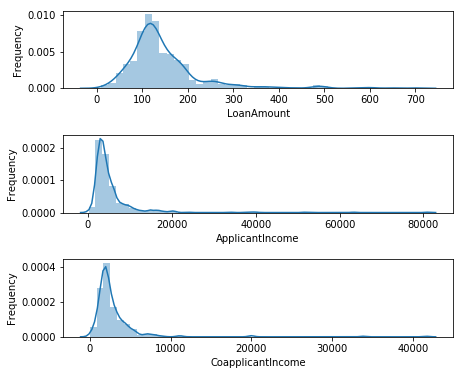

In [7]:
plots_list = ['LoanAmount','ApplicantIncome','CoapplicantIncome']
f,ax = plt.subplots(3,figsize=(7,6))
f.subplots_adjust(hspace=0.6)
for i,label in enumerate(plots_list):
    sns.distplot(train_df[train_df[label]>0][label],ax=ax[i])
    ax[i].set_xlabel(label)
    ax[i].set_ylabel('Frequency')
plt.show()

### Data preprocessing

We see that in the dataset there is a `Loan_ID` column which obviously won't have any impact on whether the loan will be issued or not. Therefore we remove it from both the training and validation datasets.

In [8]:
train_df = train_df.iloc[:,1:]
validation_df = validation_df.iloc[:,1:]

As seen above, some of the entries in the datasets are not numeral, but categorical. Therefore, we replace the categorical entries with integer numbers.

In [9]:
replace_dict = {'Graduate':1,'Not Graduate':0,
                 'Yes':1,'No':0,
                 'Urban':2,'Semiurban':1,'Rural':0,
                 'Y':1,'N':0,
                 'Male':1,'Female':0,
                 '3+':4}
train_df=train_df.replace(replace_dict)
validation_df=validation_df.replace(replace_dict)

Let's now have a look at the correlation matrix, to have some insight on which entries will have the highest impact on the `Loan_Status`.

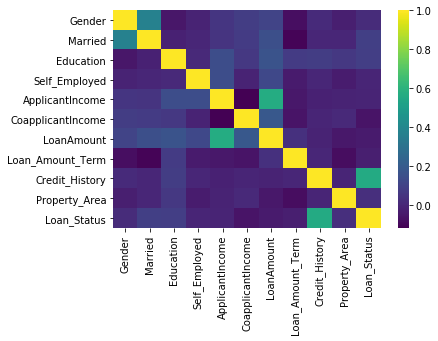

In [10]:
sns.heatmap(train_df.corr(),
            xticklabels=train_df.corr().columns.values,
            yticklabels=train_df.corr().columns.values,cmap='viridis')
plt.show()

It is clear that, for this dataset, the credit history is the biggest factor when it comes to decide whether a loan is issued or not. There is also a significant correlation between the amount of the loan and the income ot the applicant.

Before going further we also have to take care of the missing data in the datasets:

In [11]:
for _ in range(2): # the following code needs to be run twice.
    train_df = train_df.replace({float('NaN'):np.nan}).fillna(train_df.mean())
    validation_df = validation_df.replace({float('NaN'):np.nan}).fillna(validation_df.mean())

The datasets now look like this: {{train_df.head(4)}}

### Logistic Regression and testing 

Given that the output is binary (the loan is either issued or not), we use a Logistic Regression, implemented through the `sklearn` library.

In [12]:
logreg = lm.LogisticRegression(solver='lbfgs',verbose=0,max_iter=1000).fit(train_df.iloc[:,:-1],train_df.iloc[:,-1])

We can then use the fitted model `logreg` to make predictions on the validation dataset:

In [13]:
predicted = logreg.predict(validation_df.iloc[:,:-1])

and the accuracy of the model is {{f"{(logreg.score(validation_df.iloc[:,:-1],validation_df.iloc[:,-1])*100):.3}"}}%.

Further, we can check the "confusion matrix" to have an insight on the occurence of false-positives and false-negatives:

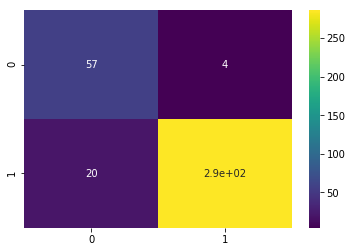

In [14]:
sns.heatmap(sk.metrics.confusion_matrix(predicted,validation_df.iloc[:,-1]),cmap='viridis',annot=True)
plt.show()

### What if we only train with the credit history?

The result we got was pretty good. However... What happens if we just forget about all the features except the credit history?

Let's do a new fit only with credit history:

In [15]:
logreg1 = lm.LogisticRegression(solver='lbfgs',verbose=0,max_iter=1000).fit(np.reshape(np.array(train_df['Credit_History']),(-1,1)),train_df.iloc[:,-1])

In [16]:
predicted1 = logreg1.predict(np.reshape(np.array(validation_df['Credit_History']),(-1,1)))

the accuracy of the model is {{f"{(logreg1.score(np.reshape(np.array(validation_df['Credit_History']),(-1,1)),validation_df.iloc[:,-1])*100):.3}"}}%. 

Notably, the predictive power of the model increased by getting rid of all but one feature!

And again, the "confusion matrix" follows

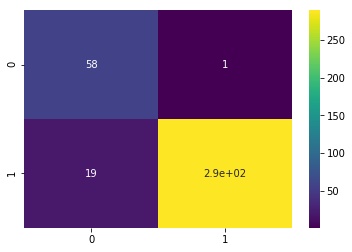

In [17]:
sns.heatmap(sk.metrics.confusion_matrix(predicted1,validation_df.iloc[:,-1]),cmap='viridis',annot=True)
plt.show()